In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Housing.csv') 

In [3]:
df.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.shape

(545, 13)

In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [8]:
# validation of data types for columns classified as objects 
for column in df.columns:
    if df[column].dtype == 'object':
        print(f"Column '{column}' has non-numeric values: {df[column].unique()}")

Column 'mainroad' has non-numeric values: ['yes' 'no']
Column 'guestroom' has non-numeric values: ['no' 'yes']
Column 'basement' has non-numeric values: ['no' 'yes']
Column 'hotwaterheating' has non-numeric values: ['no' 'yes']
Column 'airconditioning' has non-numeric values: ['yes' 'no']
Column 'prefarea' has non-numeric values: ['yes' 'no']
Column 'furnishingstatus' has non-numeric values: ['furnished' 'semi-furnished' 'unfurnished']


In [9]:
num = df.select_dtypes(include=['int64', 'float64'])

In [10]:
num

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2
...,...,...,...,...,...,...
540,1820000,3000,2,1,1,2
541,1767150,2400,3,1,1,0
542,1750000,3620,2,1,1,0
543,1750000,2910,3,1,1,0


In [11]:
num.shape

(545, 6)

In [12]:
#  Columns with a small number of unique values are considered categorical, as they represent categories or labels, not continuous data.
for i in df.columns:
    x = df[i].value_counts()
    print(f'{i} = {len(x)}')

price = 219
area = 284
bedrooms = 6
bathrooms = 4
stories = 4
mainroad = 2
guestroom = 2
basement = 2
hotwaterheating = 2
airconditioning = 2
parking = 4
prefarea = 2
furnishingstatus = 3


In [13]:
cat = df.drop(columns=['price', 'area'])

In [14]:
cat

,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,4,4,4,yes,no,no,no,yes,3,no,furnished
2,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...
540,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
cat.shape

(545, 11)

In [16]:
corr_matrix = num.corr()

In [17]:
corr_matrix

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: >

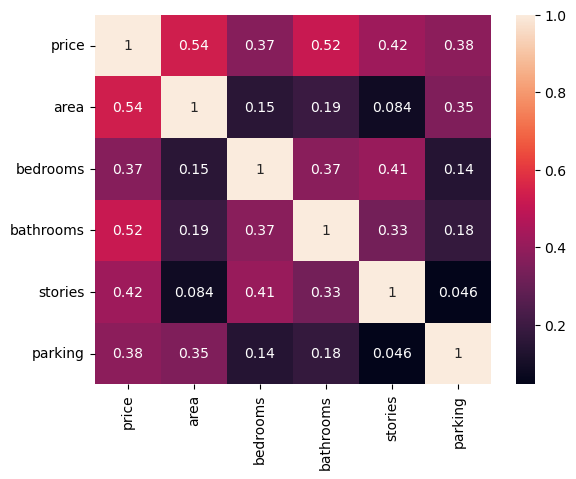

In [18]:
sns.heatmap(corr_matrix, annot=True)

- area vs price --- strong corr
- bedrooms vs price --- moderate +ve corr
- bathrooms vs price --- weak to moderate +ve corr
- stories vs price --- moderate +ve corr
- parking vs price --- weak to moderate +ve vorr

<Axes: xlabel='price', ylabel='Count'>

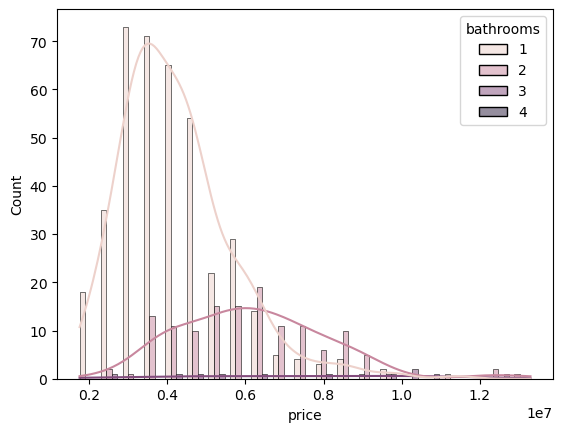

In [19]:
sns.histplot(data=num, x='price', hue='bathrooms', kde = True, multiple='dodge', cbar=True)

- most common price range: around 5-6 Million dolllars
- most common number of bathrooms: 2,3,1
- least common number of bathrooms: 4
- r/s btw number of bathrooms and price: as number of bathrooms increases, price increases

Handling outliers 

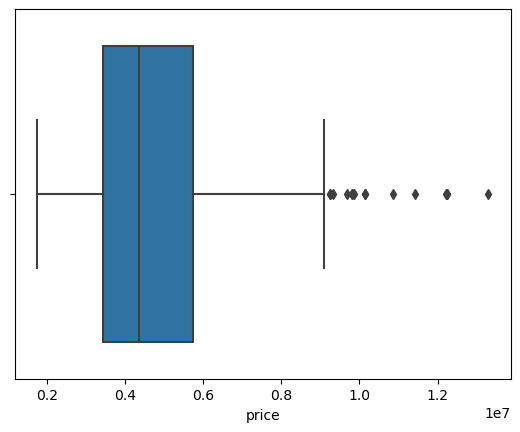

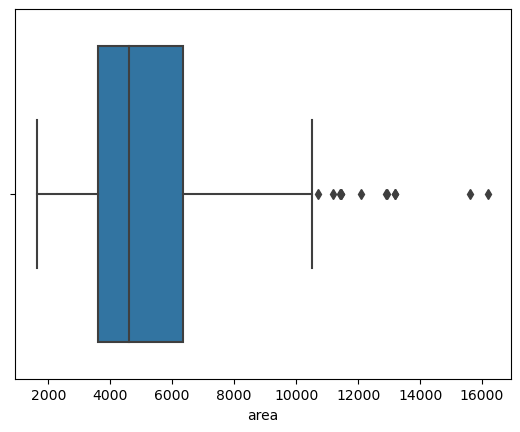

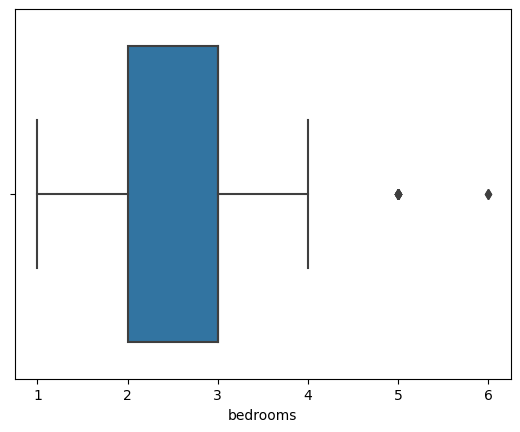

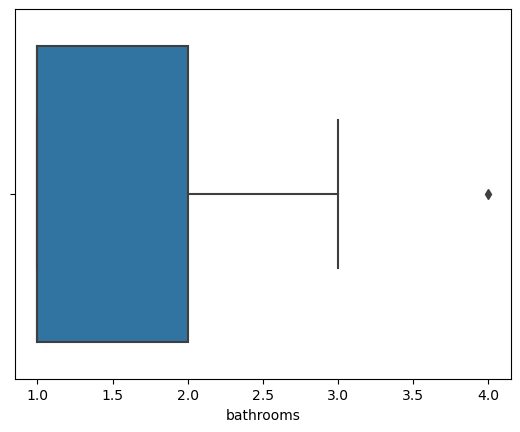

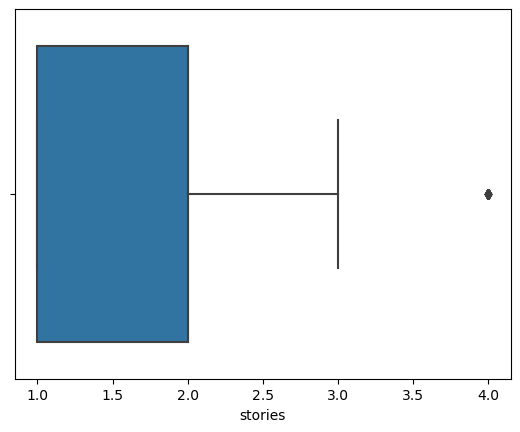

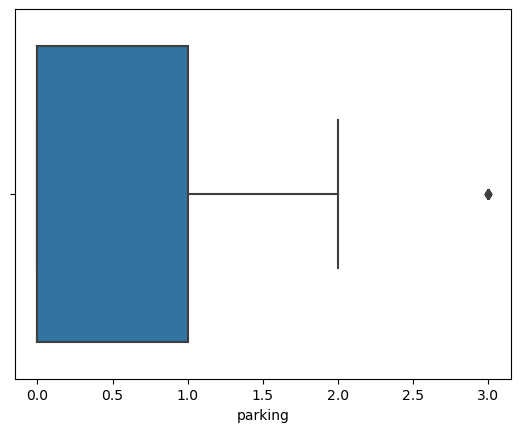

In [20]:
for i in num.columns:
    sns.boxplot(data=num, x=num[i])
    plt.show()

- there are very few outliers 

Understanding cat columns data  

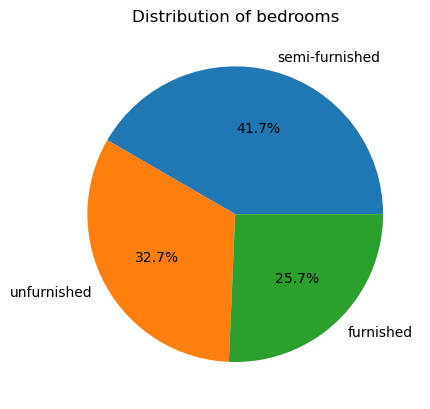

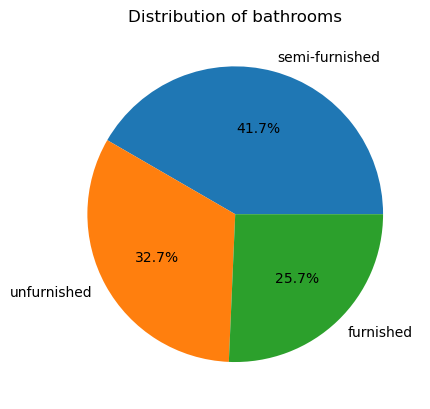

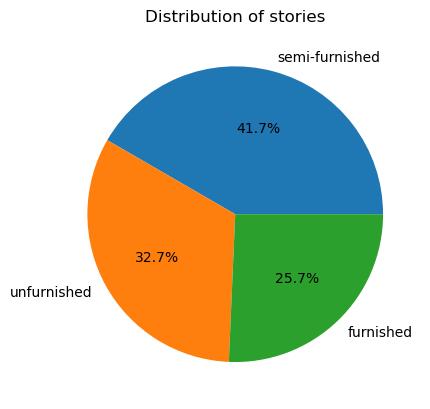

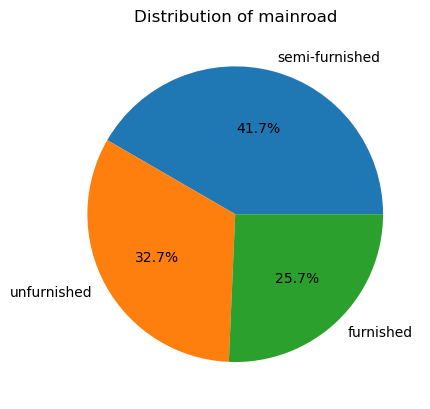

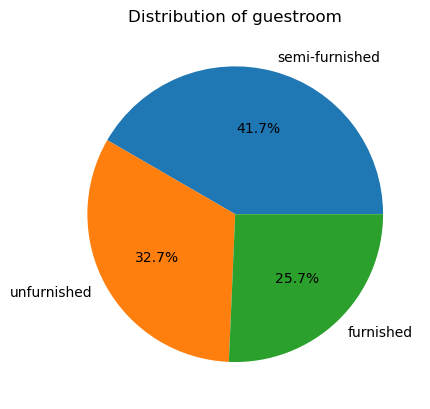

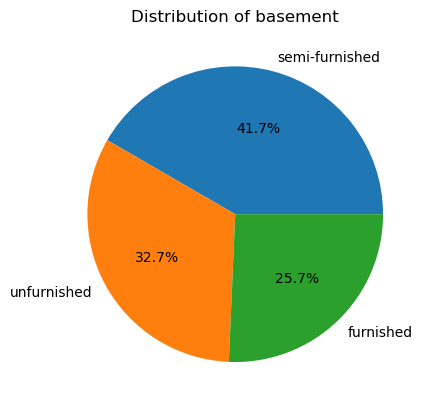

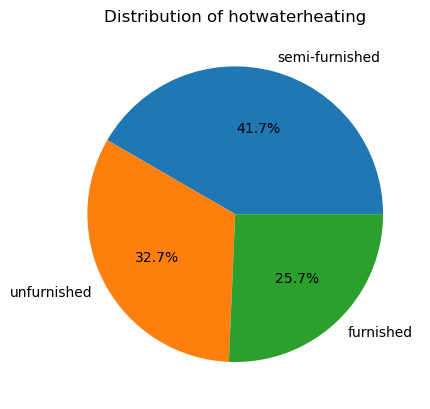

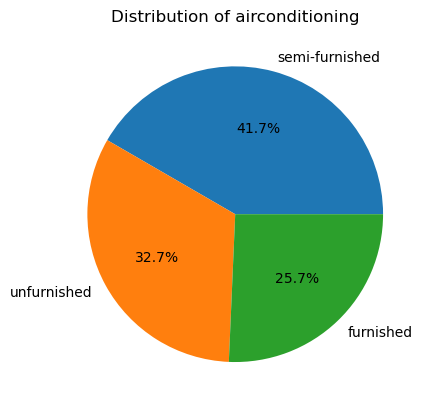

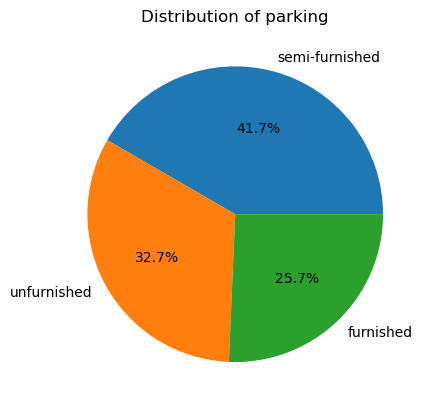

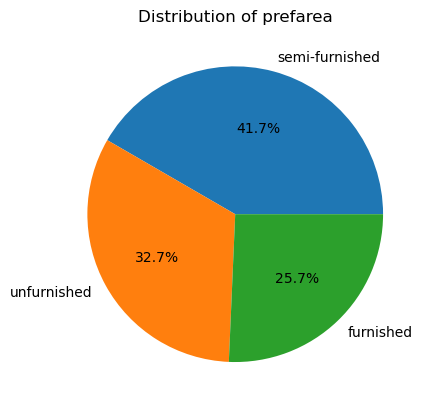

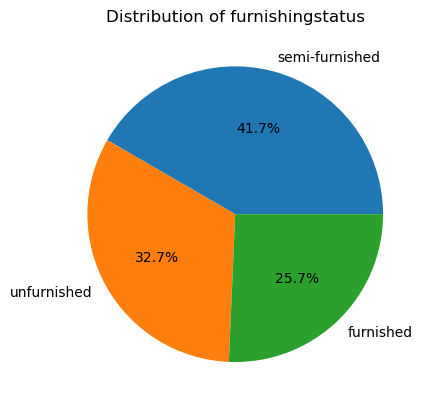

In [21]:
for i in cat.columns:
    plt.pie(x, labels=x.index, autopct='%1.1f%%')
    plt.title(f"Distribution of {i}")
    plt.show()

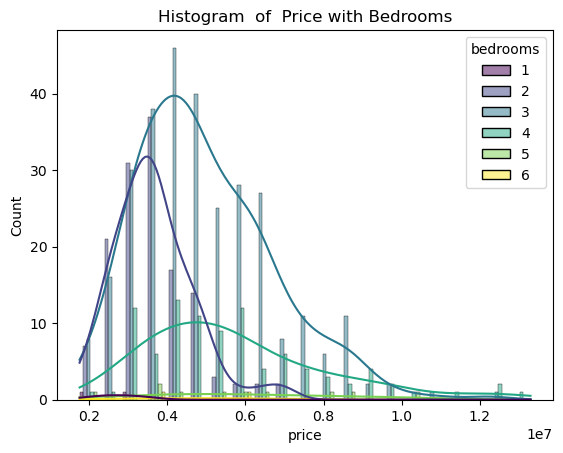

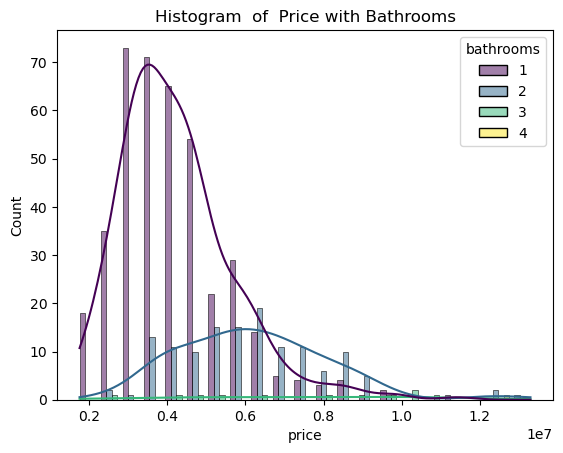

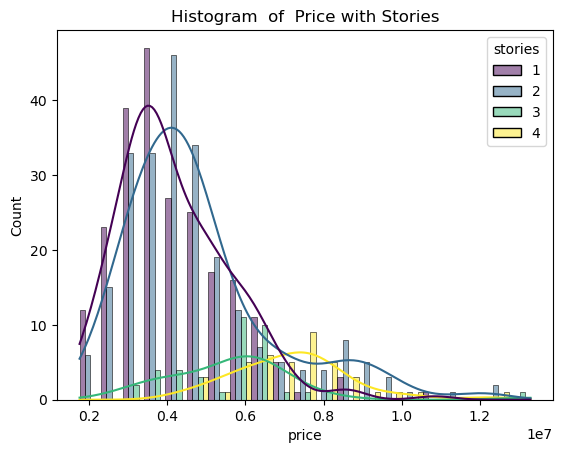

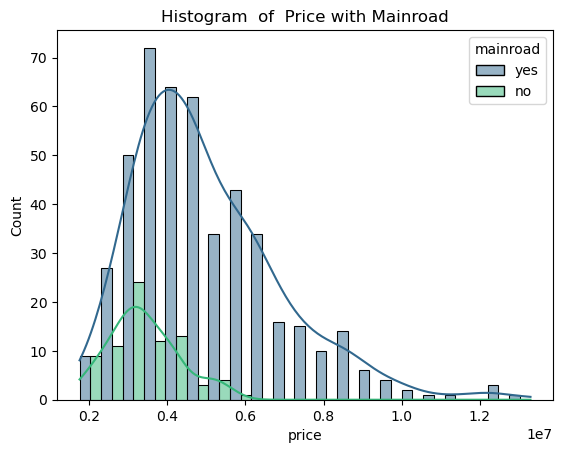

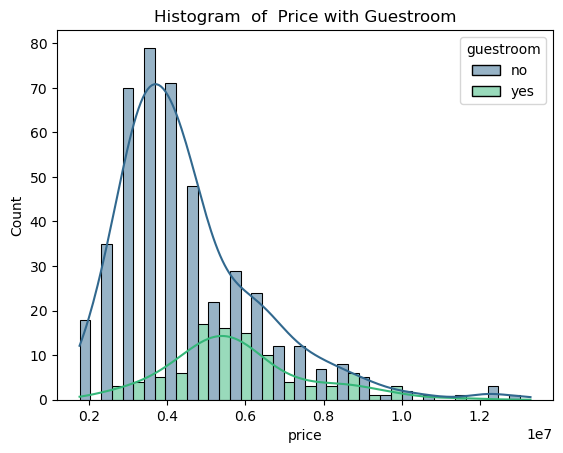

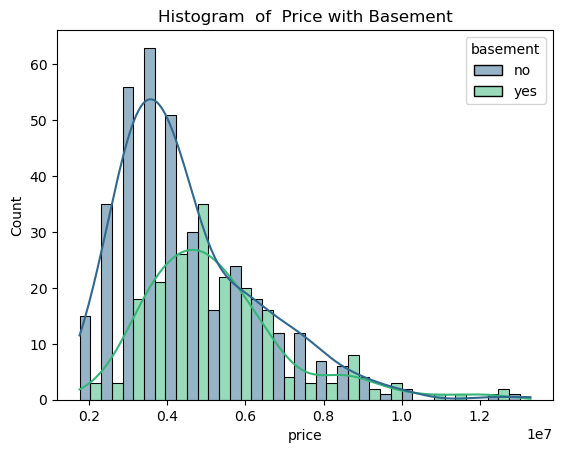

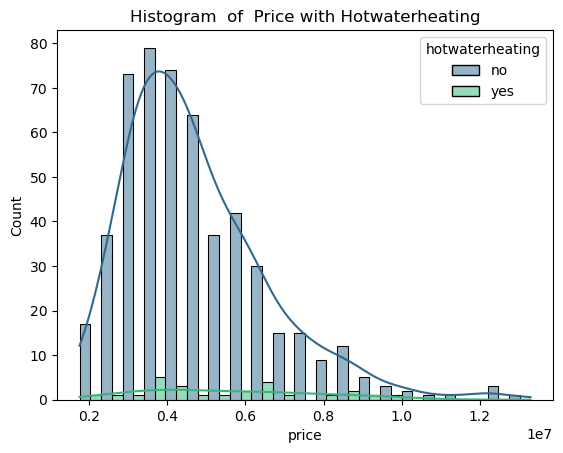

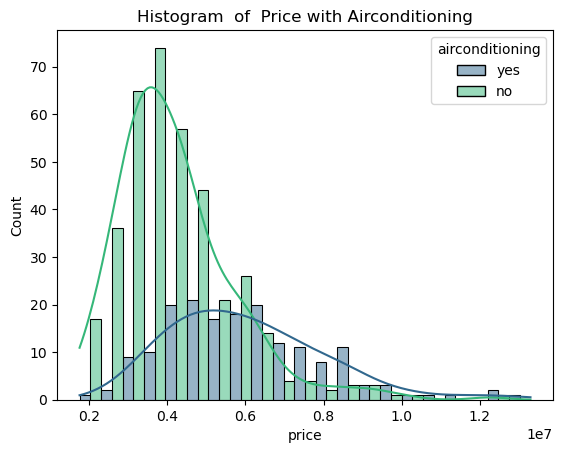

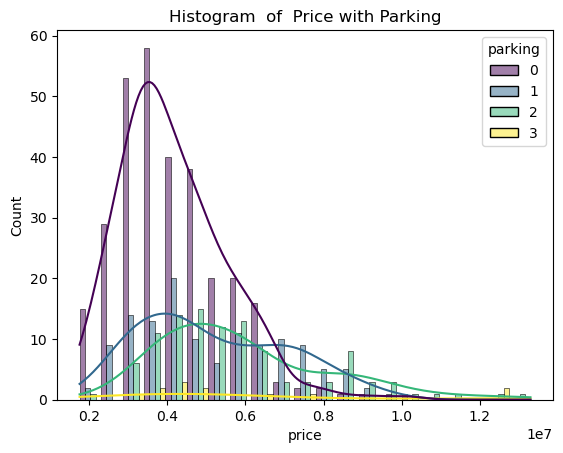

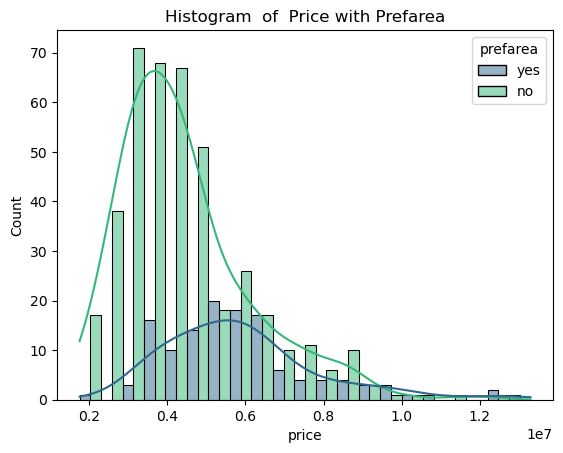

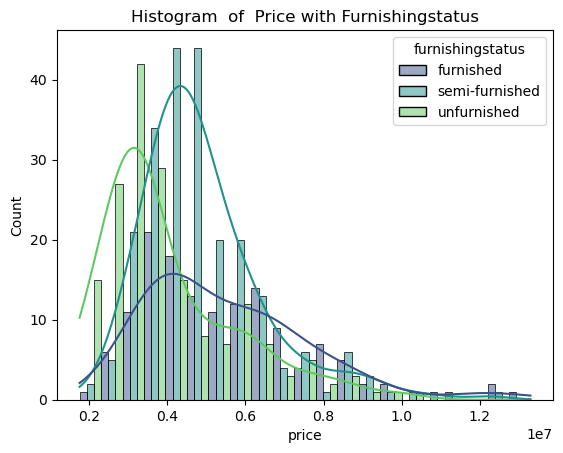

In [22]:
for i  in cat.columns:
    sns.histplot(data=df,x="price", hue=i, kde=True ,palette="viridis" ,multiple='dodge')
    plt.title(f"Histogram  of  Price with {i.capitalize()}")
    plt.show()

label encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
for i in cat.columns:
    df[i] = le.fit_transform(df[i])

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,3,1,2,1,0,0,0,1,2,1,0
1,12250000,8960,3,3,3,1,0,0,0,1,3,0,0
2,12250000,9960,2,1,1,1,0,1,0,0,2,1,1
3,12215000,7500,3,1,1,1,0,1,0,1,3,1,0
4,11410000,7420,3,0,1,1,1,1,0,1,2,0,0


scaling

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [27]:
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [28]:
df_normalized

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.5
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


Data modelling

In [29]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [30]:
df2 = df_normalized.copy()

In [31]:
x = df2.drop(columns='price')
y = df2['price']

In [32]:
x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0
1,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0
2,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0
4,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0


In [33]:
y.head()

0    1.000000
1    0.909091
2    0.909091
3    0.906061
4    0.836364
Name: price, dtype: float64

In [34]:
x.shape

(545, 12)

In [35]:
y.shape

(545,)

In [36]:
# Splitting into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
x_train.shape

(436, 12)

In [38]:
x_test.shape

(109, 12)

In [39]:
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred =lr.predict(x_test)

In [41]:
lr.score(x_test, y_pred)

1.0

In [42]:
lr.coef_

array([ 0.29710819,  0.03401493,  0.28496552,  0.10551251,  0.03175967,
        0.02018587,  0.03403981,  0.05955682,  0.06801304,  0.05863806,
        0.05453694, -0.0364324 ])

In [43]:
lr.intercept_

0.04451501866662852

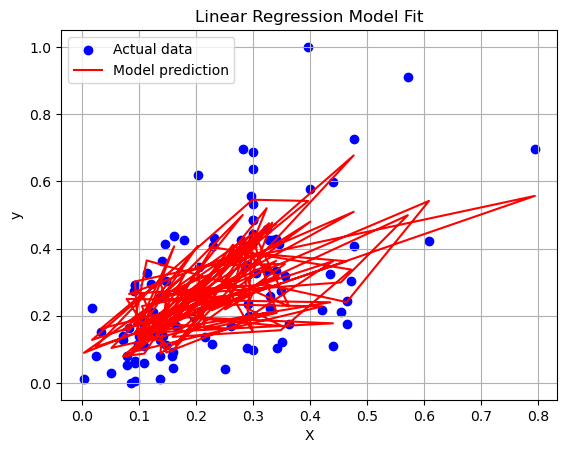

In [44]:
plt.scatter(x_test['area'], y_test, color='blue', label='Actual data')
plt.plot(x_test['area'], y_pred, color='red', label='Model prediction')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model Fit')
plt.legend()
plt.grid(True)
plt.show()